In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# data_path = '/Users/keilongwong/Library/CloudStorage/OneDrive-個人/IPM PhD/Thesis/Data/Samsung INR21700 30T 3Ah Li-ion Battery Data'
data_path = '/Users/keilongwong/Library/CloudStorage/OneDrive-個人/IPM PhD/Thesis/Data/Multi Temperature Li-ion Battery Data - SB LiMotive 5Ah/Data'

In [3]:
# loop all csv in data_path and append all rows in one dataframe
df = pd.DataFrame()
for dir in os.listdir(data_path):
    if os.path.isdir(os.path.join(data_path, dir)):
        for file in os.listdir(os.path.join(data_path, dir)):
            if file.endswith('.csv'):
                file_path = os.path.join(data_path, dir, file)
                # print(file_path)
                time_stamp_line_idx = 0

                with open(file_path) as f:
                    for i, line in enumerate(f):
                        if 'Time Stamp' in line:
                            time_stamp_line_idx = i
                            break
                
                new_df = pd.read_csv(file_path, 
                                     skiprows=time_stamp_line_idx + 2, 
                                     header=None,
                                     index_col=False,
                                     names=['Time Stamp',
                                            'Step',
                                            'Status',
                                            'Prog Time',
                                            'Step Time',
                                            'Cycle',
                                            'Cycle Level',
                                            'Procedure',
                                            'Voltage',
                                            'Current',
                                            'Temperature',
                                            'Capacity',
                                            'WhAccu',
                                            'Cnt'],
                                     )
                
                new_df['Timestamp'] = pd.to_datetime(new_df['Time Stamp']).apply(lambda x: x.timestamp())
                new_df['Exp Temperature'] = dir
                new_df['Cycle Name'] = file[:-4]
                new_df['Exp Name'] = dir + ': ' + file[:-4]
                df = pd.concat([df, new_df])
                
df = df.reset_index(drop=True)

In [4]:
df.sort_values(by=['Timestamp'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [5]:
df

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt,Timestamp,Exp Temperature,Cycle Name,Exp Name
0,2/24/2019 5:19:11 PM,23,DCH,74:23:24.684,00:01:00.009,0,0,Limotive_NN_Char,4.18333,-0.24692,38.17986,-0.00413,-0.01727,22.0,1.551029e+09,40 deg,693_C20DisCh,40 deg: 693_C20DisCh
1,2/24/2019 5:20:11 PM,23,DCH,74:24:24.680,00:02:00.005,0,0,Limotive_NN_Char,4.18215,-0.24947,38.07410,-0.00827,-0.03459,22.0,1.551029e+09,40 deg,693_C20DisCh,40 deg: 693_C20DisCh
2,2/24/2019 5:21:11 PM,23,DCH,74:25:24.689,00:03:00.014,0,0,Limotive_NN_Char,4.1808,-0.24947,38.28562,-0.01241,-0.05191,22.0,1.551029e+09,40 deg,693_C20DisCh,40 deg: 693_C20DisCh
3,2/24/2019 5:22:11 PM,23,DCH,74:26:24.686,00:04:00.011,0,0,Limotive_NN_Char,4.17962,-0.24692,38.17986,-0.01655,-0.06922,22.0,1.551029e+09,40 deg,693_C20DisCh,40 deg: 693_C20DisCh
4,2/24/2019 5:23:11 PM,23,DCH,74:27:24.681,00:05:00.006,0,0,Limotive_NN_Char,4.17844,-0.24692,38.28562,-0.02069,-0.08650,22.0,1.551029e+09,40 deg,693_C20DisCh,40 deg: 693_C20DisCh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854593,7/7/2019 7:40:05 PM,81,PAU,25:55:07.076,00:09:59.704,0,0,Limotive_CyclesB,3.5021,0.00000,-19.98890,-3.75490,-11.70030,62.0,1.562528e+09,-20 deg,878_PausCycl,-20 deg: 878_PausCycl
2854594,7/7/2019 7:40:05 PM,81,PAU,25:55:07.178,00:09:59.806,0,0,Limotive_CyclesB,3.5021,0.00000,-19.98890,-3.75490,-11.70030,62.0,1.562528e+09,-20 deg,878_PausCycl,-20 deg: 878_PausCycl
2854595,7/7/2019 7:40:05 PM,81,PAU,25:55:07.271,00:09:59.899,0,0,Limotive_CyclesB,3.5021,0.00000,-19.98890,-3.75490,-11.70030,62.0,1.562528e+09,-20 deg,878_PausCycl,-20 deg: 878_PausCycl
2854596,7/7/2019 7:40:05 PM,81,PAU,25:55:07.372,00:10:00.000,0,0,Limotive_CyclesB,3.5021,0.00000,-19.98890,-3.75490,-11.70030,62.0,1.562528e+09,-20 deg,878_PausCycl,-20 deg: 878_PausCycl


In [6]:
# plt.plot(df[df['Exp Name'] == '40degC: 722_Mixed4']['Capacity'])

In [7]:
stats = []
for key, group in df.groupby('Exp Name'):
  stats.append((group['Timestamp'].iloc[0], group['Exp Name'].iloc[0]))
stats = pd.DataFrame(stats, columns=['Timestamp', 'Exp Name'])
stats.sort_values(by=['Timestamp'], inplace=True)
stats.to_csv('stats.csv', index=False)

In [8]:
caps = []
for key, group in df.groupby(['Exp Name']):
    # if ('1C' not in key) and ('Charge' not in key) and ('0p5c' not in key) and ('2C' not in key):
    #     continue
    if 'Charge' not in key:
        continue
    cap_max = group['Capacity'].abs().max()
    cap_total_trapz = abs(np.trapz(group['Current'].values, group['Timestamp'].values) / 3600)
    if cap_total_trapz < 1 or cap_total_trapz > 5:
        continue
    caps.append((group['Timestamp'].iloc[0], cap_max, cap_total_trapz))
caps = np.array(caps)

/var/folders/h8/8jpw1q2n08b3k_kml79456t40000gn/T/ipykernel_30334/4265470472.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in df.groupby(['Exp Name']):


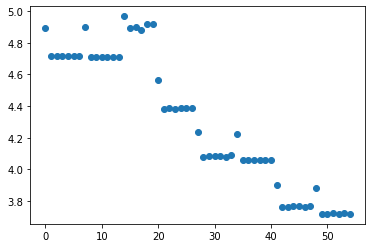

In [9]:
sort_caps = caps[caps[:, 0].argsort()]
plt.scatter(range(len(sort_caps)), sort_caps[:, 2])